In [131]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\7_week\BP_data.csv"
df = pd.read_csv(file_path)

In [133]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [135]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [139]:
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

<Axes: ylabel='count'>

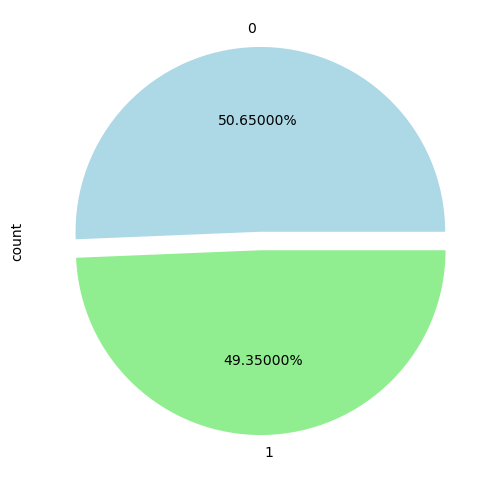

In [141]:
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
df['Blood_Pressure_Abnormality'].value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05))

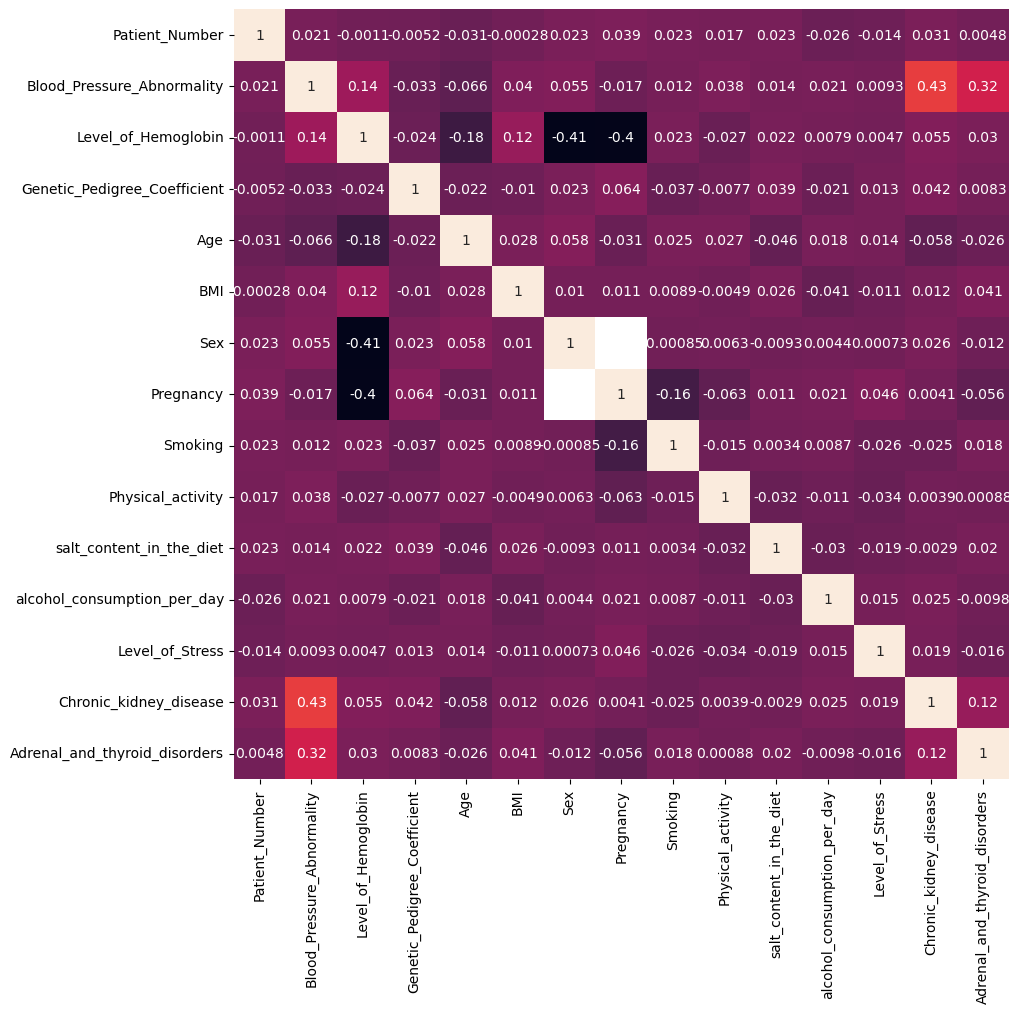

In [145]:
import seaborn as sns

df_corr=df.corr() # 각 컬럼 별 상관계수를 나타냄 (-1 ~ 1사이로)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cbar = False) # annot : 상관관계를 나타냄, cbar : 왼쪽에 바를 표시
plt.show()

In [147]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [151]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(0) # 가족력도 없는 경우 0으로 
df['Pregnancy'] = df['Pregnancy'].fillna(0) # 임신은 0과 1로 나눔
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean()) # 알콜은 평균

In [153]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [155]:
df.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

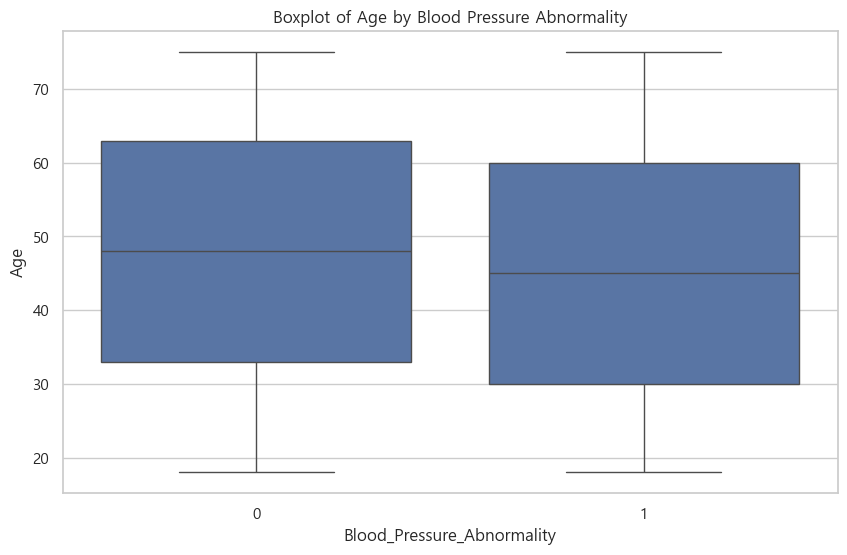

In [201]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Blood_Pressure_Abnormality', y='Age', data=df)
plt.title('Boxplot of Age by Blood Pressure Abnormality')
plt.show()

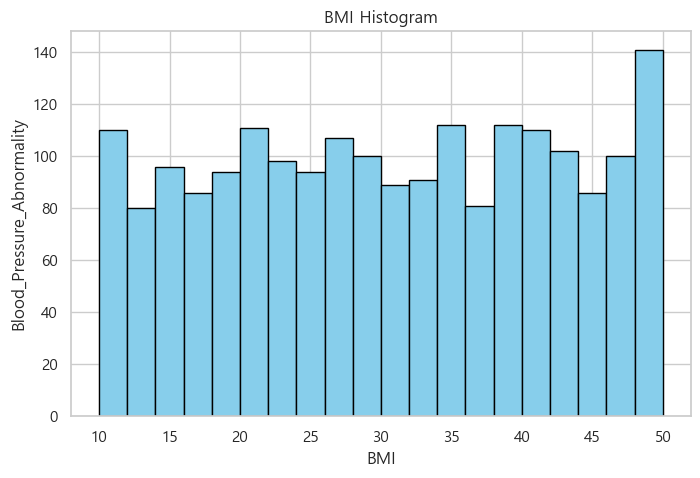

In [191]:
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Blood_Pressure_Abnormality')
plt.grid(True)
plt.show()

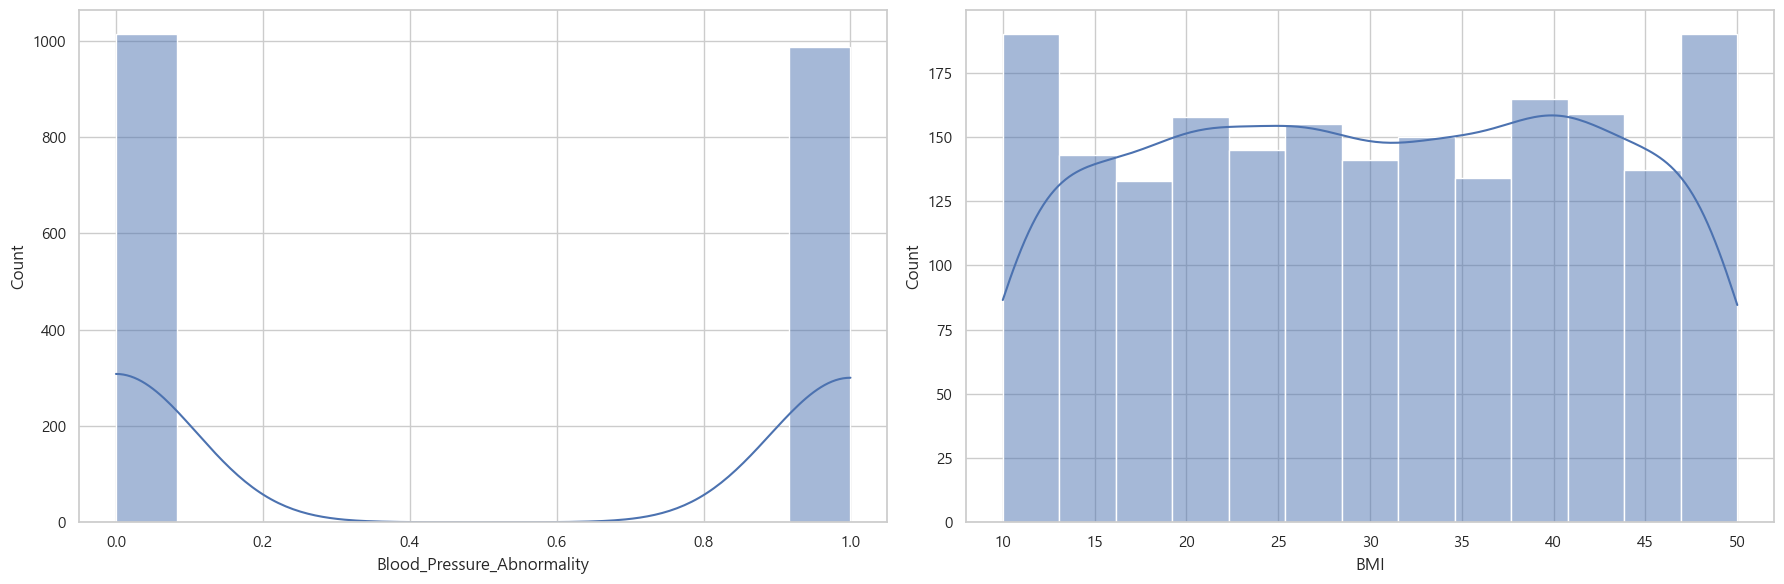

In [205]:
figure = plt.figure(figsize=(18,6))

# 첫 번째 서브플롯: 'Blood_Pressure_Abnormality'에 대해 displot 사용
ax1 = plt.subplot(1, 2, 1)
sns.histplot(df['Blood_Pressure_Abnormality'], kde=True, ax=ax1)  # distplot 대신 histplot 사용

# 두 번째 서브플롯: 'BMI'에 대해 displot 사용
ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], kde=True, ax=ax2)  # distplot 대신 histplot 사용

plt.tight_layout()
plt.show()

In [157]:
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler() # Standardize the data
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 14), (400, 14), (1600,), (400,))

In [163]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [165]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [169]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(14, 512)
        self.fc2 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 512)
        self.fc6 = nn.Linear(512, 128)
        self.fc7 = nn.Linear(128, 1)  # 결과가 2개로 나누어지기 때문
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

In [171]:
model = ClassificationModel()

In [173]:
criterion = nn.BCEWithLogitsLoss() # 2진 분류
optimizer = optim.Adam(model.parameters(), lr=0.008)

In [175]:
train_losses = []
test_accuracies = []
num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_dataloader:
        labels = labels.float().unsqueeze(1)  # [32] -> [32, 1] 2진분류이기 때문에 필요함 
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # 평균손실 저장
    train_losses.append(running_loss / len(train_dataloader))

    # 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.float().unsqueeze(1)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            predicted = (probs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/15, Loss: 0.7081, Accuracy: 75.25%
Epoch 2/15, Loss: 0.4808, Accuracy: 79.75%
Epoch 3/15, Loss: 0.4125, Accuracy: 83.00%
Epoch 4/15, Loss: 0.3663, Accuracy: 82.50%
Epoch 5/15, Loss: 0.3618, Accuracy: 81.50%
Epoch 6/15, Loss: 0.3479, Accuracy: 83.75%
Epoch 7/15, Loss: 0.3191, Accuracy: 81.75%
Epoch 8/15, Loss: 0.3238, Accuracy: 84.25%
Epoch 9/15, Loss: 0.3280, Accuracy: 83.50%
Epoch 10/15, Loss: 0.2887, Accuracy: 82.50%
Epoch 11/15, Loss: 0.2510, Accuracy: 81.00%
Epoch 12/15, Loss: 0.2374, Accuracy: 82.75%
Epoch 13/15, Loss: 0.2343, Accuracy: 82.00%
Epoch 14/15, Loss: 0.2181, Accuracy: 82.50%
Epoch 15/15, Loss: 0.2046, Accuracy: 82.25%


In [177]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        predicted = (probs > 0.5).float()
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy().reshape(-1))  # shape 일치

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 정확도 계산 함수들에 zero_division 추가 (경고 방지용)
precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_predictions, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_predictions, average='weighted', zero_division=0)

# Specificity 계산
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp + 1e-6))  # 0으로 나누는 경우 방지

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[173  35]
 [ 36 156]]
F1 Score: 0.82
Precision: 0.82
Recall: 0.82
Specificity: 0.82


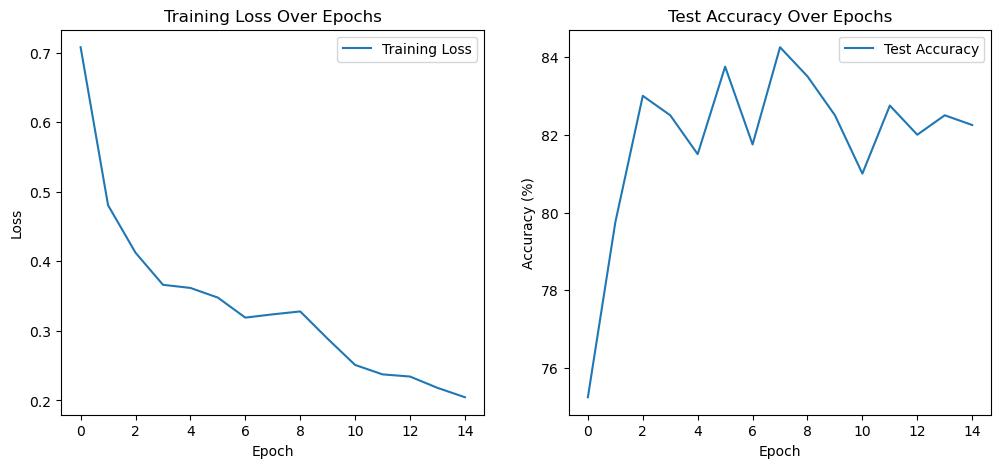

In [179]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()